15127
L_T1
L_T2
L_T3
L_T4
L_T5
L_T6
L_T7
F_PU1
S_PU1
F_PU2
S_PU2
F_PU3
S_PU3
F_PU4
S_PU4
F_PU5
S_PU5
F_PU6
S_PU6
F_PU7
S_PU7
F_PU8
S_PU8
F_PU9
S_PU9
F_PU10
S_PU10
F_PU11
S_PU11
F_V2
S_V2
P_J280
P_J269
P_J300
P_J256
P_J289
P_J415
P_J302
P_J306
P_J307
P_J317
P_J14
P_J422


C:\Users\peiwa\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\peiwa\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:114: UserWarning: Features [15 16 23 24] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx,
C:\Users\peiwa\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:116: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
C:\Users\peiwa\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[ 7 20 19  9  3 10 25 26  4 14 34 13  2 22 38  6 21  5 36  1  8 40 32 29
 30 41 37 39 31 42 33 35  0 28 27 12 11 18 17 24 23 16 15]
F_PU1
0.13429398325995232

S_PU7
0.2371598113486223

F_PU7
1.7486416602779704

F_PU2
3.9687802328735557

L_T4
3.975187288438649

S_PU2
5.920323890256317

F_PU10
11.511051824769789

S_PU10
13.063757529392694

L_T5
21.85897676130417

S_PU4
22.40630956879596

P_J256
23.12000997394069

F_PU4
23.92584038201517

L_T3
24.839660871159765

S_PU8
25.562625595114593

P_J306
27.648747118509018

L_T7
27.849261966289042

F_PU8
29.964091872589716

L_T6
33.050726189629

P_J415
35.07383659319829

L_T2
42.85935502039134

S_PU1
47.20260597600259

P_J317
48.55322366908857

P_J269
48.6427183283327

F_V2
51.48135921247695

S_V2
52.74362234947069

P_J14
54.38295727787743

P_J302
67.84009202730738

P_J307
70.26686767060863

P_J280
75.65963911815271

P_J422
78.9733153470025

P_J300
85.80948898215864

P_J289
87.42588880474014

L_T1
108.60335982951435

S_PU11
600.8643557292806

F_PU

C:\Users\peiwa\anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1844: RuntimeWarning: invalid value encountered in true_divide
  x = np.asarray((x - loc)/scale, dtype=dtyp)


P_J14
P_J422
           Causality      ANOVA-F  Mutual_info   Kendall   Outlier      Bias  \
L_T1   -1.671193e-02   108.603360     0.021426  0.050169  0.005685  0.061688   
L_T2   -4.038062e-02    42.859355     0.014220  0.025262  0.005685  0.065653   
L_T3   -1.142244e-03    24.839661     0.034193  0.017157  0.005884  0.062789   
L_T4   -1.363475e-02     3.975187     0.045118 -0.002668  0.005950  0.063891   
L_T5    1.461532e-02    21.858977     0.029161  0.015097  0.005950  0.060366   
L_T6    5.059039e-02    33.050726     0.036729  0.015501  0.005751  0.067636   
L_T7   -7.222590e-03    27.849262     0.025255  0.020302  0.005817  0.064111   
F_PU1  -2.522601e-02     0.134294     0.003326 -0.007545  0.005289  0.081956   
S_PU1   2.764172e+00    47.202606     0.007749  0.110200  0.005553  0.061027   
F_PU2   6.990730e-04     3.968780     0.003688 -0.009793  0.005950  0.079753   
S_PU2  -2.423453e-01     5.920324     0.007540  0.004906  0.006082  0.068297   
F_PU3   6.833626e-03  1241.

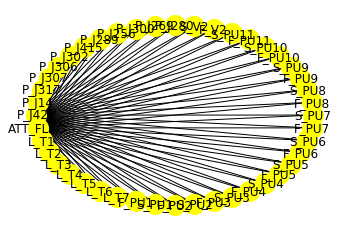

In [50]:
import pandas as pd
data_aia = pd.read_csv('SDACA_currupted_100.csv')
print(len(data_aia))
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
data_aia.ATT_FLAG = le.fit_transform(data_aia.ATT_FLAG)
X_AIA = data_aia.drop('ATT_FLAG',1)
y_AIA = data_aia[['ATT_FLAG']]




from sklearn.linear_model import LogisticRegression
from mlxtend.evaluate import bias_variance_decomp
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
result9 = {}
result10 = {}
for i in X_AIA.columns:
    print(i)
    X = X_AIA[i].to_numpy().reshape(-1, 1)
    y = y_AIA.to_numpy().reshape(-1)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
    model = DecisionTreeClassifier(random_state=123)
    avg_expected_loss, avg_bias, avg_var = bias_variance_decomp(model, X_train,
                                                            y_train, X_test,
                                                            y_test, 
                                                            loss='0-1_loss',                                 
                                                            num_rounds=10,
                                                            random_seed=123)

    result9[i] = avg_bias
    result10[i] = avg_var
    
    
    
import numpy
result8 = {}
for i in X_AIA.columns:
    arr = X_AIA[i].values
#     print(arr)
    mean = numpy.mean(arr, axis=0)
    sd = numpy.std(arr, axis=0)
#     print(mean,sd)
    final_list1 = [x for x in arr if (x > mean + 3 * sd)]
    final_list2 = [x for x in final_list1 if (x < mean - 3 * sd)]

    result8[i] = (len(final_list1)+len(final_list2))/len(arr)
    
    
results = {}
from dowhy import CausalModel
causes = X_AIA.columns
for treatment in causes:
    model = CausalModel(
                data=data_aia,
                treatment=treatment,
                outcome='ATT_FLAG',
                common_causes=[cause for cause in causes if treatment != cause]
            )
    model.view_model()
    # Identify the effect/estimand for this data
    estimand = model.identify_effect()

    # Find an estimate for the effect of the IV (Outliers), factoring in the common causes for a causal approach
    estimate = model.estimate_effect(estimand, method_name="backdoor.linear_regression", test_significance=True)

    # Put the causal score in the dictionary
    results[treatment] = estimate.value
    
from sklearn.feature_selection import *
import numpy as np
select = SelectPercentile(percentile=100,score_func = f_classif)
select.fit(X_AIA, y_AIA)
# X_selected = select.transform(X_AIA)

print(np.argsort(select.scores_))

result2 = {}
for i in np.argsort(select.scores_) :
    print(X_AIA.columns[i])
    print(select.scores_[i])
    print()
    result2[X_AIA.columns[i]] = select.scores_[i]
    
from sklearn.feature_selection import *
import numpy as np
select = SelectPercentile(percentile=100,score_func = mutual_info_classif)
select.fit(X_AIA, y_AIA)
# X_selected = select.transform(X_AIA)

print(np.argsort(select.scores_))
result3 = {}
for i in np.argsort(select.scores_) :
    print(X_AIA.columns[i])
    print(select.scores_[i])
    print()
    result3[X_AIA.columns[i]] = select.scores_[i]
    
from scipy import stats
result7={}
for i in X_AIA.columns:
    print(i)
    print(stats.kendalltau(X_AIA[i], y_AIA))
    print()
    result7[i] = stats.kendalltau(X_AIA[i], y_AIA)[0]
    
# distribution
from scipy import stats
from scipy.stats import uniform,norm

result11={}

for i in X_AIA.columns:
    print(i)
    
    data = X_AIA[i]
#     data.plot()
    loc, scale = norm.fit(data)
    n = norm(loc=loc, scale=scale)
    D_value = stats.kstest(data,n.cdf)
    result11[i] = D_value[0]
    
df_all = pd.DataFrame([results,result2,result3,result7,result8,result9,result10,result11])
df_all = df_all.T
df_all.columns = ['Causality','ANOVA-F','Mutual_info','Kendall','Outlier','Bias','Variance','Distribution']
print(df_all)
df_all.to_csv('stats_scada_currupted100.csv')

15227
L_T1
L_T2
L_T3
L_T4
L_T5
L_T6
L_T7
F_PU1
S_PU1
F_PU2
S_PU2
F_PU3
S_PU3
F_PU4
S_PU4
F_PU5
S_PU5
F_PU6
S_PU6
F_PU7
S_PU7
F_PU8
S_PU8
F_PU9
S_PU9
F_PU10
S_PU10
F_PU11
S_PU11
F_V2
S_V2
P_J280
P_J269
P_J300
P_J256
P_J289
P_J415
P_J302
P_J306
P_J307
P_J317
P_J14
P_J422


C:\Users\peiwa\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\peiwa\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:114: UserWarning: Features [15 16 23 24] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx,
C:\Users\peiwa\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:116: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
C:\Users\peiwa\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[ 8 19  7 20  9  3 10 25 26 34 14  4 13  2  6 22 21 38  5 36  1 40 32 30
 29 41 37 39 31 42 33 35  0 28 27 11 18 12 17 24 23 16 15]
S_PU1
6.462530304725164

F_PU7
6.574222076089648

F_PU1
13.671108852729075

S_PU7
20.669699558146032

F_PU2
35.2956869662161

L_T4
35.455273505470686

S_PU2
38.2995660508293

F_PU10
50.53616615493467

S_PU10
55.50631190339416

P_J256
70.52798815729588

S_PU4
71.48803689599549

L_T5
71.71782782942695

F_PU4
73.93837643719992

L_T3
74.07515646629349

L_T7
79.25202598321319

S_PU8
79.93742323029196

F_PU8
82.73337618774654

P_J306
83.88981976704295

L_T6
86.14952441076541

P_J415
90.29170769597974

L_T2
102.68899209852286

P_J317
111.58556226665655

P_J269
112.48208521462799

S_V2
118.84989477300178

F_V2
119.22258000129774

P_J14
119.72212622302818

P_J302
141.3037690775228

P_J307
141.462098348732

P_J280
152.88636673085807

P_J422
156.43583883975833

P_J300
164.6856494133174

P_J289
168.30153561282472

L_T1
192.04834147509015

S_PU11
750.8693182654264

F_P

C:\Users\peiwa\anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1844: RuntimeWarning: invalid value encountered in true_divide
  x = np.asarray((x - loc)/scale, dtype=dtyp)


F_PU8
S_PU8
F_PU9
S_PU9
F_PU10
S_PU10
F_PU11
S_PU11
F_V2
S_V2
P_J280
P_J269
P_J300
P_J256
P_J289
P_J415
P_J302
P_J306
P_J307
P_J317
P_J14
P_J422
           Causality      ANOVA-F  Mutual_info   Kendall   Outlier      Bias  \
L_T1   -1.610296e-02   192.048341     0.023936  0.062724  0.009785  0.060407   
L_T2   -4.167246e-02   102.688992     0.017109  0.038587  0.009851  0.071132   
L_T3   -3.763574e-03    74.075156     0.039083  0.030715  0.009457  0.062815   
L_T4   -1.260499e-02    35.455274     0.045983  0.011543  0.010114  0.065660   
L_T5    8.549535e-03    71.717828     0.030864  0.028777  0.008866  0.068505   
L_T6    4.488622e-02    86.149524     0.035349  0.031406  0.009063  0.062815   
L_T7   -7.095980e-03    79.252026     0.030852  0.033762  0.009588  0.071569   
F_PU1  -2.566587e-02    13.671109     0.004786  0.006806  0.010114  0.079448   
S_PU1   2.453441e+00     6.462530     0.015593  0.162692  0.009982  0.070913   
F_PU2   3.265785e-03    35.295687     0.003665  0.00519

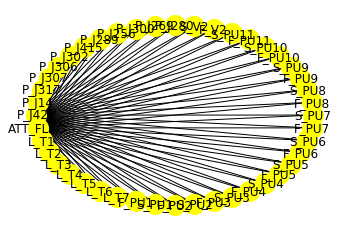

In [51]:
import pandas as pd
data_aia = pd.read_csv('SDACA_currupted_200.csv')
print(len(data_aia))
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
data_aia.ATT_FLAG = le.fit_transform(data_aia.ATT_FLAG)
X_AIA = data_aia.drop('ATT_FLAG',1)
y_AIA = data_aia[['ATT_FLAG']]




from sklearn.linear_model import LogisticRegression
from mlxtend.evaluate import bias_variance_decomp
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
result9 = {}
result10 = {}
for i in X_AIA.columns:
    print(i)
    X = X_AIA[i].to_numpy().reshape(-1, 1)
    y = y_AIA.to_numpy().reshape(-1)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
    model = DecisionTreeClassifier(random_state=123)
    avg_expected_loss, avg_bias, avg_var = bias_variance_decomp(model, X_train,
                                                            y_train, X_test,
                                                            y_test, 
                                                            loss='0-1_loss',                                 
                                                            num_rounds=10,
                                                            random_seed=123)

    result9[i] = avg_bias
    result10[i] = avg_var
    
    
    
import numpy
result8 = {}
for i in X_AIA.columns:
    arr = X_AIA[i].values
#     print(arr)
    mean = numpy.mean(arr, axis=0)
    sd = numpy.std(arr, axis=0)
#     print(mean,sd)
    final_list1 = [x for x in arr if (x > mean + 3 * sd)]
    final_list2 = [x for x in final_list1 if (x < mean - 3 * sd)]

    result8[i] = (len(final_list1)+len(final_list2))/len(arr)
    
    
results = {}
from dowhy import CausalModel
causes = X_AIA.columns
for treatment in causes:
    model = CausalModel(
                data=data_aia,
                treatment=treatment,
                outcome='ATT_FLAG',
                common_causes=[cause for cause in causes if treatment != cause]
            )
    model.view_model()
    # Identify the effect/estimand for this data
    estimand = model.identify_effect()

    # Find an estimate for the effect of the IV (Outliers), factoring in the common causes for a causal approach
    estimate = model.estimate_effect(estimand, method_name="backdoor.linear_regression", test_significance=True)

    # Put the causal score in the dictionary
    results[treatment] = estimate.value
    
from sklearn.feature_selection import *
import numpy as np
select = SelectPercentile(percentile=100,score_func = f_classif)
select.fit(X_AIA, y_AIA)
# X_selected = select.transform(X_AIA)

print(np.argsort(select.scores_))

result2 = {}
for i in np.argsort(select.scores_) :
    print(X_AIA.columns[i])
    print(select.scores_[i])
    print()
    result2[X_AIA.columns[i]] = select.scores_[i]
    
from sklearn.feature_selection import *
import numpy as np
select = SelectPercentile(percentile=100,score_func = mutual_info_classif)
select.fit(X_AIA, y_AIA)
# X_selected = select.transform(X_AIA)

print(np.argsort(select.scores_))
result3 = {}
for i in np.argsort(select.scores_) :
    print(X_AIA.columns[i])
    print(select.scores_[i])
    print()
    result3[X_AIA.columns[i]] = select.scores_[i]
    
from scipy import stats
result7={}
for i in X_AIA.columns:
    print(i)
    print(stats.kendalltau(X_AIA[i], y_AIA))
    print()
    result7[i] = stats.kendalltau(X_AIA[i], y_AIA)[0]
    
# distribution
from scipy import stats
from scipy.stats import uniform,norm

result11={}

for i in X_AIA.columns:
    print(i)
    
    data = X_AIA[i]
#     data.plot()
    loc, scale = norm.fit(data)
    n = norm(loc=loc, scale=scale)
    D_value = stats.kstest(data,n.cdf)
    result11[i] = D_value[0]
    
df_all = pd.DataFrame([results,result2,result3,result7,result8,result9,result10,result11])
df_all = df_all.T
df_all.columns = ['Causality','ANOVA-F','Mutual_info','Kendall','Outlier','Bias','Variance','Distribution']
print(df_all)
df_all.to_csv('stats_scada_currupted200.csv')

15327
L_T1
L_T2
L_T3
L_T4
L_T5
L_T6
L_T7
F_PU1
S_PU1
F_PU2
S_PU2
F_PU3
S_PU3
F_PU4
S_PU4
F_PU5
S_PU5
F_PU6
S_PU6
F_PU7
S_PU7
F_PU8
S_PU8
F_PU9
S_PU9
F_PU10
S_PU10
F_PU11
S_PU11
F_V2
S_V2
P_J280
P_J269
P_J300
P_J256
P_J289
P_J415
P_J302
P_J306
P_J307
P_J317
P_J14
P_J422


C:\Users\peiwa\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\peiwa\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:114: UserWarning: Features [15 16 23 24] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx,
C:\Users\peiwa\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:116: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
C:\Users\peiwa\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[ 8 19  7 20  9  3 10 25 26 34  4 14 13  2 21  6 22 38  5 36  1 40 29 32
 41 30 39 37 31 42 33 35  0 28 27 11 18 12 17 24 23 16 15]
S_PU1
3.2205985730465234

F_PU7
43.02446115810678

F_PU1
56.657340527402866

S_PU7
71.80668607093361

F_PU2
96.6344092227125

L_T4
98.27417265052433

S_PU2
99.14072865170928

F_PU10
122.84639167027582

S_PU10
128.94228853669816

P_J256
149.8548522111607

L_T5
151.367510639516

S_PU4
152.60547581099271

F_PU4
152.91438898027542

L_T3
159.4052531259047

F_PU8
160.52665769102052

L_T7
162.6927359234244

S_PU8
164.15961057596806

P_J306
166.06170476277074

L_T6
173.22556590252773

P_J415
175.18787220589346

L_T2
193.6734530953775

P_J317
203.1984031024419

F_V2
205.50367053885776

P_J269
205.58267039603217

P_J14
208.6561765592476

S_V2
213.53714566073978

P_J307
235.75557818380724

P_J302
240.51490283877354

P_J280
253.0402577371188

P_J422
264.05747066460725

P_J300
267.3109169892125

P_J289
273.1413710972769

L_T1
305.2481643899772

S_PU11
924.2289075469068

C:\Users\peiwa\anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1844: RuntimeWarning: invalid value encountered in true_divide
  x = np.asarray((x - loc)/scale, dtype=dtyp)


P_J307
P_J317
P_J14
P_J422
           Causality      ANOVA-F  Mutual_info   Kendall   Outlier      Bias  \
L_T1   -1.569865e-02   305.248164     0.027315  0.075890  0.011874  0.069363   
L_T2   -4.506437e-02   193.673453     0.025077  0.052507  0.012527  0.077626   
L_T3   -3.929832e-03   159.405253     0.041543  0.044931  0.012788  0.073929   
L_T4   -1.248292e-02    98.274173     0.049718  0.026312  0.013310  0.068711   
L_T5    3.886674e-03   151.367511     0.036229  0.043002  0.012396  0.071755   
L_T6    4.887088e-02   173.225566     0.037538  0.047950  0.013114  0.068276   
L_T7   -3.824770e-03   162.692736     0.032725  0.047906  0.010896  0.074364   
F_PU1  -2.244562e-02    56.657341     0.008791  0.021697  0.011026  0.091977   
S_PU1   1.962020e+00     3.220599     0.015855  0.206060  0.012396  0.072407   
F_PU2   1.262930e-03    96.634409     0.011589  0.020678  0.013049  0.075669   
S_PU2  -3.766065e-01    99.140729     0.010950  0.048859  0.011874  0.067189   
F_PU3  -1.244

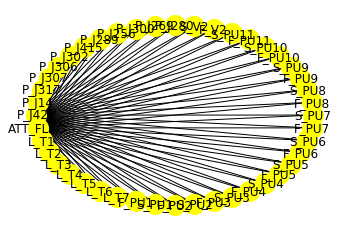

In [52]:
import pandas as pd
data_aia = pd.read_csv('SDACA_currupted_300.csv')
print(len(data_aia))
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
data_aia.ATT_FLAG = le.fit_transform(data_aia.ATT_FLAG)
X_AIA = data_aia.drop('ATT_FLAG',1)
y_AIA = data_aia[['ATT_FLAG']]




from sklearn.linear_model import LogisticRegression
from mlxtend.evaluate import bias_variance_decomp
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
result9 = {}
result10 = {}
for i in X_AIA.columns:
    print(i)
    X = X_AIA[i].to_numpy().reshape(-1, 1)
    y = y_AIA.to_numpy().reshape(-1)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
    model = DecisionTreeClassifier(random_state=123)
    avg_expected_loss, avg_bias, avg_var = bias_variance_decomp(model, X_train,
                                                            y_train, X_test,
                                                            y_test, 
                                                            loss='0-1_loss',                                 
                                                            num_rounds=10,
                                                            random_seed=123)

    result9[i] = avg_bias
    result10[i] = avg_var
    
    
    
import numpy
result8 = {}
for i in X_AIA.columns:
    arr = X_AIA[i].values
#     print(arr)
    mean = numpy.mean(arr, axis=0)
    sd = numpy.std(arr, axis=0)
#     print(mean,sd)
    final_list1 = [x for x in arr if (x > mean + 3 * sd)]
    final_list2 = [x for x in final_list1 if (x < mean - 3 * sd)]

    result8[i] = (len(final_list1)+len(final_list2))/len(arr)
    
    
results = {}
from dowhy import CausalModel
causes = X_AIA.columns
for treatment in causes:
    model = CausalModel(
                data=data_aia,
                treatment=treatment,
                outcome='ATT_FLAG',
                common_causes=[cause for cause in causes if treatment != cause]
            )
    model.view_model()
    # Identify the effect/estimand for this data
    estimand = model.identify_effect()

    # Find an estimate for the effect of the IV (Outliers), factoring in the common causes for a causal approach
    estimate = model.estimate_effect(estimand, method_name="backdoor.linear_regression", test_significance=True)

    # Put the causal score in the dictionary
    results[treatment] = estimate.value
    
from sklearn.feature_selection import *
import numpy as np
select = SelectPercentile(percentile=100,score_func = f_classif)
select.fit(X_AIA, y_AIA)
# X_selected = select.transform(X_AIA)

print(np.argsort(select.scores_))

result2 = {}
for i in np.argsort(select.scores_) :
    print(X_AIA.columns[i])
    print(select.scores_[i])
    print()
    result2[X_AIA.columns[i]] = select.scores_[i]
    
from sklearn.feature_selection import *
import numpy as np
select = SelectPercentile(percentile=100,score_func = mutual_info_classif)
select.fit(X_AIA, y_AIA)
# X_selected = select.transform(X_AIA)

print(np.argsort(select.scores_))
result3 = {}
for i in np.argsort(select.scores_) :
    print(X_AIA.columns[i])
    print(select.scores_[i])
    print()
    result3[X_AIA.columns[i]] = select.scores_[i]
    
from scipy import stats
result7={}
for i in X_AIA.columns:
    print(i)
    print(stats.kendalltau(X_AIA[i], y_AIA))
    print()
    result7[i] = stats.kendalltau(X_AIA[i], y_AIA)[0]
    
# distribution
from scipy import stats
from scipy.stats import uniform,norm

result11={}

for i in X_AIA.columns:
    print(i)
    
    data = X_AIA[i]
#     data.plot()
    loc, scale = norm.fit(data)
    n = norm(loc=loc, scale=scale)
    D_value = stats.kstest(data,n.cdf)
    result11[i] = D_value[0]
    
df_all = pd.DataFrame([results,result2,result3,result7,result8,result9,result10,result11])
df_all = df_all.T
df_all.columns = ['Causality','ANOVA-F','Mutual_info','Kendall','Outlier','Bias','Variance','Distribution']
print(df_all)
df_all.to_csv('stats_scada_currupted300.csv')

15427
L_T1
L_T2
L_T3
L_T4
L_T5
L_T6
L_T7
F_PU1
S_PU1
F_PU2
S_PU2
F_PU3
S_PU3
F_PU4
S_PU4
F_PU5
S_PU5
F_PU6
S_PU6
F_PU7
S_PU7
F_PU8
S_PU8
F_PU9
S_PU9
F_PU10
S_PU10
F_PU11
S_PU11
F_V2
S_V2
P_J280
P_J269
P_J300
P_J256
P_J289
P_J415
P_J302
P_J306
P_J307
P_J317
P_J14
P_J422


C:\Users\peiwa\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\peiwa\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:114: UserWarning: Features [15 16 23 24] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx,
C:\Users\peiwa\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:116: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
C:\Users\peiwa\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[ 8 19  7 20  9  3 10 25 26 14  4 34 13  2 22  6 21  5 38 36  1 40 32 29
 41 30 37 39 31 42 35 33  0 28 27 11 12 18 17 24 23 16 15]
S_PU1
49.55419236761395

F_PU7
139.29741465052987

F_PU1
158.08163424977667

S_PU7
176.77118542736463

F_PU2
214.45522629604122

L_T4
215.72230889289077

S_PU2
222.90022905993015

F_PU10
246.61715716700704

S_PU10
255.14757230366703

S_PU4
284.0183066401279

L_T5
287.3307463643368

P_J256
287.41329451259327

F_PU4
293.8318785622268

L_T3
296.0552350598801

S_PU8
303.3144767326895

L_T7
307.63724197477137

F_PU8
314.7824633653658

L_T6
315.38988252567646

P_J306
317.1826617762175

P_J415
324.1062171961946

L_T2
344.87277169138713

P_J317
352.7172898476427

P_J269
356.3421911413783

F_V2
358.0355891301755

P_J14
368.42395865135285

S_V2
369.0544994419691

P_J302
402.79527374810874

P_J307
408.97586578749275

P_J280
421.41799679287027

P_J422
423.0879626288672

P_J289
437.45058242646485

P_J300
442.0276230600636

L_T1
473.62967946180567

S_PU11
1205.199991540

C:\Users\peiwa\anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1844: RuntimeWarning: invalid value encountered in true_divide
  x = np.asarray((x - loc)/scale, dtype=dtyp)


P_J307
P_J317
P_J14
P_J422
           Causality      ANOVA-F  Mutual_info   Kendall   Outlier      Bias  \
L_T1   -1.592521e-02   473.629679     0.035297  0.092742  0.013029  0.071074   
L_T2   -3.660244e-02   344.872772     0.028475  0.070351  0.013548  0.074530   
L_T3   -3.191762e-03   296.055235     0.045178  0.063023  0.012899  0.071506   
L_T4   -1.039923e-02   215.722309     0.056764  0.045091  0.014455  0.073666   
L_T5    5.578719e-03   287.330746     0.044071  0.061173  0.013353  0.073234   
L_T6    4.797989e-02   315.389883     0.045540  0.069003  0.013937  0.073666   
L_T7   -5.949720e-03   307.637242     0.036579  0.065864  0.013742  0.068913   
F_PU1  -2.172704e-02   158.081634     0.015283  0.040648  0.013224  0.086844   
S_PU1   2.222203e+00    49.554192     0.024515  0.259694  0.013612  0.072370   
F_PU2  -5.265576e-04   214.455226     0.016602  0.040418  0.012899  0.078635   
S_PU2  -1.910352e-01   222.900229     0.024794  0.076930  0.013677  0.066753   
F_PU3   3.943

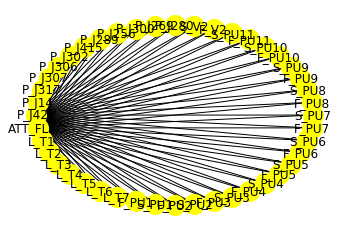

In [53]:
import pandas as pd
data_aia = pd.read_csv('SDACA_currupted_400.csv')
print(len(data_aia))
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
data_aia.ATT_FLAG = le.fit_transform(data_aia.ATT_FLAG)
X_AIA = data_aia.drop('ATT_FLAG',1)
y_AIA = data_aia[['ATT_FLAG']]




from sklearn.linear_model import LogisticRegression
from mlxtend.evaluate import bias_variance_decomp
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
result9 = {}
result10 = {}
for i in X_AIA.columns:
    print(i)
    X = X_AIA[i].to_numpy().reshape(-1, 1)
    y = y_AIA.to_numpy().reshape(-1)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
    model = DecisionTreeClassifier(random_state=123)
    avg_expected_loss, avg_bias, avg_var = bias_variance_decomp(model, X_train,
                                                            y_train, X_test,
                                                            y_test, 
                                                            loss='0-1_loss',                                 
                                                            num_rounds=10,
                                                            random_seed=123)

    result9[i] = avg_bias
    result10[i] = avg_var
    
    
    
import numpy
result8 = {}
for i in X_AIA.columns:
    arr = X_AIA[i].values
#     print(arr)
    mean = numpy.mean(arr, axis=0)
    sd = numpy.std(arr, axis=0)
#     print(mean,sd)
    final_list1 = [x for x in arr if (x > mean + 3 * sd)]
    final_list2 = [x for x in final_list1 if (x < mean - 3 * sd)]

    result8[i] = (len(final_list1)+len(final_list2))/len(arr)
    
    
results = {}
from dowhy import CausalModel
causes = X_AIA.columns
for treatment in causes:
    model = CausalModel(
                data=data_aia,
                treatment=treatment,
                outcome='ATT_FLAG',
                common_causes=[cause for cause in causes if treatment != cause]
            )
    model.view_model()
    # Identify the effect/estimand for this data
    estimand = model.identify_effect()

    # Find an estimate for the effect of the IV (Outliers), factoring in the common causes for a causal approach
    estimate = model.estimate_effect(estimand, method_name="backdoor.linear_regression", test_significance=True)

    # Put the causal score in the dictionary
    results[treatment] = estimate.value
    
from sklearn.feature_selection import *
import numpy as np
select = SelectPercentile(percentile=100,score_func = f_classif)
select.fit(X_AIA, y_AIA)
# X_selected = select.transform(X_AIA)

print(np.argsort(select.scores_))

result2 = {}
for i in np.argsort(select.scores_) :
    print(X_AIA.columns[i])
    print(select.scores_[i])
    print()
    result2[X_AIA.columns[i]] = select.scores_[i]
    
from sklearn.feature_selection import *
import numpy as np
select = SelectPercentile(percentile=100,score_func = mutual_info_classif)
select.fit(X_AIA, y_AIA)
# X_selected = select.transform(X_AIA)

print(np.argsort(select.scores_))
result3 = {}
for i in np.argsort(select.scores_) :
    print(X_AIA.columns[i])
    print(select.scores_[i])
    print()
    result3[X_AIA.columns[i]] = select.scores_[i]
    
from scipy import stats
result7={}
for i in X_AIA.columns:
    print(i)
    print(stats.kendalltau(X_AIA[i], y_AIA))
    print()
    result7[i] = stats.kendalltau(X_AIA[i], y_AIA)[0]
    
# distribution
from scipy import stats
from scipy.stats import uniform,norm

result11={}

for i in X_AIA.columns:
    print(i)
    
    data = X_AIA[i]
#     data.plot()
    loc, scale = norm.fit(data)
    n = norm(loc=loc, scale=scale)
    D_value = stats.kstest(data,n.cdf)
    result11[i] = D_value[0]
    
df_all = pd.DataFrame([results,result2,result3,result7,result8,result9,result10,result11])
df_all = df_all.T
df_all.columns = ['Causality','ANOVA-F','Mutual_info','Kendall','Outlier','Bias','Variance','Distribution']
print(df_all)
df_all.to_csv('stats_scada_currupted400.csv')

15527
L_T1
L_T2
L_T3
L_T4
L_T5
L_T6
L_T7
F_PU1
S_PU1
F_PU2
S_PU2
F_PU3
S_PU3
F_PU4
S_PU4
F_PU5
S_PU5
F_PU6
S_PU6
F_PU7
S_PU7
F_PU8
S_PU8
F_PU9
S_PU9
F_PU10
S_PU10
F_PU11
S_PU11
F_V2
S_V2
P_J280
P_J269
P_J300
P_J256
P_J289
P_J415
P_J302
P_J306
P_J307
P_J317
P_J14
P_J422


C:\Users\peiwa\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\peiwa\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:114: UserWarning: Features [15 16 23 24] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx,
C:\Users\peiwa\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:116: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
C:\Users\peiwa\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[ 8 19  7 20  3  9 10 25 26 34  4 14  2  6 22 13 38 21  5 36  1 40 32 29
 30 41 37 39 31 42 33 35  0 28 27 11 12 18 17 24 23 16 15]
S_PU1
60.96502895670767

F_PU7
151.59277718680406

F_PU1
176.63806033443348

S_PU7
196.40628721138188

L_T4
229.12942102900806

F_PU2
240.98036841796213

S_PU2
242.88311736842542

F_PU10
263.5131662025202

S_PU10
274.0958142566557

P_J256
304.5235713913365

L_T5
308.1263617346546

S_PU4
313.6775589993323

L_T3
317.04532022260344

L_T7
324.3117985630054

S_PU8
324.53090551105726

F_PU4
324.8594445143508

P_J306
330.90556288855777

F_PU8
334.52498168501853

L_T6
337.35141747575

P_J415
338.7937281047487

L_T2
365.79017093006286

P_J317
377.045745780877

P_J269
381.685721040713

F_V2
384.8422287823183

S_V2
386.76348890118624

P_J14
393.10827961111335

P_J302
423.2715214730401

P_J307
429.1732100730521

P_J280
440.460115247853

P_J422
442.1258571367305

P_J300
458.50518263746415

P_J289
463.51295783663375

L_T1
497.7825548172082

S_PU11
1193.2560231595291

F_

C:\Users\peiwa\anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1844: RuntimeWarning: invalid value encountered in true_divide
  x = np.asarray((x - loc)/scale, dtype=dtyp)


P_J14
P_J422
           Causality      ANOVA-F  Mutual_info   Kendall   Outlier      Bias  \
L_T1   -1.870207e-02   497.782555     0.035406  0.095891  0.011850  0.072333   
L_T2   -3.327686e-02   365.790171     0.026982  0.073865  0.013654  0.077055   
L_T3    1.925958e-03   317.045320     0.047935  0.066678  0.012494  0.074265   
L_T4   -1.040792e-02   229.129421     0.054141  0.048948  0.012623  0.073621   
L_T5    6.581774e-03   308.126362     0.042671  0.064756  0.013460  0.068255   
L_T6    3.560524e-02   337.351417     0.047664  0.073109  0.012752  0.072548   
L_T7   -8.163180e-03   324.311799     0.039609  0.069412  0.013332  0.073406   
F_PU1  -2.045558e-02   176.638060     0.014408  0.044672  0.013138  0.089719   
S_PU1   1.750868e+00    60.965029     0.020139  0.248201  0.012752  0.071260   
F_PU2   8.080893e-04   240.980368     0.016833  0.044758  0.013460  0.088002   
S_PU2  -4.133767e-01   242.883117     0.020312  0.082112  0.012816  0.074909   
F_PU3  -7.159666e-03  1903.

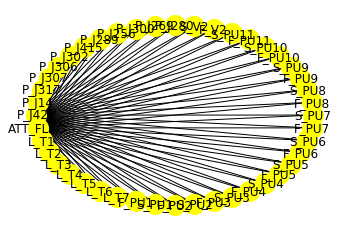

In [54]:
import pandas as pd
data_aia = pd.read_csv('SDACA_currupted_500.csv')
print(len(data_aia))
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
data_aia.ATT_FLAG = le.fit_transform(data_aia.ATT_FLAG)
X_AIA = data_aia.drop('ATT_FLAG',1)
y_AIA = data_aia[['ATT_FLAG']]




from sklearn.linear_model import LogisticRegression
from mlxtend.evaluate import bias_variance_decomp
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
result9 = {}
result10 = {}
for i in X_AIA.columns:
    print(i)
    X = X_AIA[i].to_numpy().reshape(-1, 1)
    y = y_AIA.to_numpy().reshape(-1)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
    model = DecisionTreeClassifier(random_state=123)
    avg_expected_loss, avg_bias, avg_var = bias_variance_decomp(model, X_train,
                                                            y_train, X_test,
                                                            y_test, 
                                                            loss='0-1_loss',                                 
                                                            num_rounds=10,
                                                            random_seed=123)

    result9[i] = avg_bias
    result10[i] = avg_var
    
    
    
import numpy
result8 = {}
for i in X_AIA.columns:
    arr = X_AIA[i].values
#     print(arr)
    mean = numpy.mean(arr, axis=0)
    sd = numpy.std(arr, axis=0)
#     print(mean,sd)
    final_list1 = [x for x in arr if (x > mean + 3 * sd)]
    final_list2 = [x for x in final_list1 if (x < mean - 3 * sd)]

    result8[i] = (len(final_list1)+len(final_list2))/len(arr)
    
    
results = {}
from dowhy import CausalModel
causes = X_AIA.columns
for treatment in causes:
    model = CausalModel(
                data=data_aia,
                treatment=treatment,
                outcome='ATT_FLAG',
                common_causes=[cause for cause in causes if treatment != cause]
            )
    model.view_model()
    # Identify the effect/estimand for this data
    estimand = model.identify_effect()

    # Find an estimate for the effect of the IV (Outliers), factoring in the common causes for a causal approach
    estimate = model.estimate_effect(estimand, method_name="backdoor.linear_regression", test_significance=True)

    # Put the causal score in the dictionary
    results[treatment] = estimate.value
    
from sklearn.feature_selection import *
import numpy as np
select = SelectPercentile(percentile=100,score_func = f_classif)
select.fit(X_AIA, y_AIA)
# X_selected = select.transform(X_AIA)

print(np.argsort(select.scores_))

result2 = {}
for i in np.argsort(select.scores_) :
    print(X_AIA.columns[i])
    print(select.scores_[i])
    print()
    result2[X_AIA.columns[i]] = select.scores_[i]
    
from sklearn.feature_selection import *
import numpy as np
select = SelectPercentile(percentile=100,score_func = mutual_info_classif)
select.fit(X_AIA, y_AIA)
# X_selected = select.transform(X_AIA)

print(np.argsort(select.scores_))
result3 = {}
for i in np.argsort(select.scores_) :
    print(X_AIA.columns[i])
    print(select.scores_[i])
    print()
    result3[X_AIA.columns[i]] = select.scores_[i]
    
from scipy import stats
result7={}
for i in X_AIA.columns:
    print(i)
    print(stats.kendalltau(X_AIA[i], y_AIA))
    print()
    result7[i] = stats.kendalltau(X_AIA[i], y_AIA)[0]
    
# distribution
from scipy import stats
from scipy.stats import uniform,norm

result11={}

for i in X_AIA.columns:
    print(i)
    
    data = X_AIA[i]
#     data.plot()
    loc, scale = norm.fit(data)
    n = norm(loc=loc, scale=scale)
    D_value = stats.kstest(data,n.cdf)
    result11[i] = D_value[0]
    
df_all = pd.DataFrame([results,result2,result3,result7,result8,result9,result10,result11])
df_all = df_all.T
df_all.columns = ['Causality','ANOVA-F','Mutual_info','Kendall','Outlier','Bias','Variance','Distribution']
print(df_all)
df_all.to_csv('stats_scada_currupted500.csv')

15027
L_T1
L_T2
L_T3
L_T4
L_T5
L_T6
L_T7
F_PU1
S_PU1
F_PU2
S_PU2
F_PU3
S_PU3
F_PU4
S_PU4
F_PU5
S_PU5
F_PU6
S_PU6
F_PU7
S_PU7
F_PU8
S_PU8
F_PU9
S_PU9
F_PU10
S_PU10
F_PU11
S_PU11
F_V2
S_V2
P_J280
P_J269
P_J300
P_J256
P_J289
P_J415
P_J302
P_J306
P_J307
P_J317
P_J14
P_J422


C:\Users\peiwa\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\peiwa\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:114: UserWarning: Features [15 16 23 24] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx,
C:\Users\peiwa\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:116: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
C:\Users\peiwa\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[13  2 34 14  4 22  6 21 38  5 36 26  1 25 40 32 29 30 41 10  9  3 37 39
 31 42 33 35 20  7  0 19  8 28 27 11 12 18 17 23 24 15 16]
F_PU4
7.304704080131249e-07

L_T3
0.0018815248639784902

P_J256
0.05116183409099176

S_PU4
0.052646233976099965

L_T5
0.07641410203006344

S_PU8
0.07833816806855189

L_T7
0.08474750494771954

F_PU8
0.21411689631309436

P_J306
0.22855131697571027

L_T6
0.4607977983578455

P_J415
0.7875662392349595

S_PU10
2.077475659068498

L_T2
2.5454174983721205

F_PU10
3.1282248614380297

P_J317
4.346891673327684

P_J269
4.450102917352736

F_V2
5.393173899265722

S_V2
6.158201877297623

P_J14
6.497942467087996

S_PU2
7.68964528608098

F_PU2
9.645317988593469

L_T4
9.801531377889136

P_J302
12.033422269857434

P_J307
12.947987276974715

P_J280
16.654389423021414

P_J422
17.330797589147572

P_J300
21.22348608717251

P_J289
21.604246301241382

S_PU7
22.181087012615624

F_PU1
31.969130240131136

L_T1
33.436581809931816

F_PU7
45.80690816993569

S_PU1
158.89898370311911

S_PU

C:\Users\peiwa\anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1844: RuntimeWarning: invalid value encountered in true_divide
  x = np.asarray((x - loc)/scale, dtype=dtyp)


P_J307
P_J317
P_J14
P_J422
           Causality       ANOVA-F  Mutual_info   Kendall   Outlier      Bias  \
L_T1   -2.146002e-02  3.343658e+01     0.017930  0.034497  0.000133  0.067864   
L_T2   -5.101975e-02  2.545417e+00     0.009933  0.008692  0.000000  0.059880   
L_T3    7.000651e-03  1.881525e-03     0.031133  0.000301  0.000000  0.057662   
L_T4   -1.653267e-02  9.801531e+00     0.036589 -0.020228  0.000000  0.061876   
L_T5    1.559779e-02  7.641410e-02     0.025526 -0.001834  0.000000  0.060989   
L_T6    4.354943e-02  4.607978e-01     0.027504 -0.004385  0.000000  0.053227   
L_T7   -6.180470e-03  8.474750e-02     0.019585  0.003555  0.000000  0.063207   
F_PU1   1.402868e-02  3.196913e+01     0.000000 -0.025286  0.000000  0.076735   
S_PU1  -1.879062e+00  1.588990e+02     0.004612 -0.102298  0.000000  0.058328   
F_PU2   3.716374e-03  9.645318e+00     0.000000 -0.028305  0.000000  0.071856   
S_PU2  -5.559142e-01  7.689645e+00     0.001453 -0.022617  0.000000  0.063429   
F

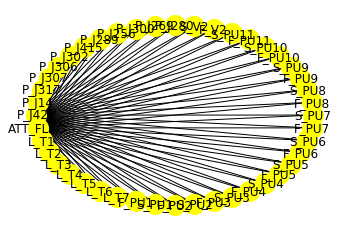

In [55]:
import pandas as pd
data_aia = pd.read_csv('SCADA.csv')
print(len(data_aia))
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
data_aia.ATT_FLAG = le.fit_transform(data_aia.ATT_FLAG)
X_AIA = data_aia.drop('ATT_FLAG',1)
y_AIA = data_aia[['ATT_FLAG']]




from sklearn.linear_model import LogisticRegression
from mlxtend.evaluate import bias_variance_decomp
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
result9 = {}
result10 = {}
for i in X_AIA.columns:
    print(i)
    X = X_AIA[i].to_numpy().reshape(-1, 1)
    y = y_AIA.to_numpy().reshape(-1)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
    model = DecisionTreeClassifier(random_state=123)
    avg_expected_loss, avg_bias, avg_var = bias_variance_decomp(model, X_train,
                                                            y_train, X_test,
                                                            y_test, 
                                                            loss='0-1_loss',                                 
                                                            num_rounds=10,
                                                            random_seed=123)

    result9[i] = avg_bias
    result10[i] = avg_var
    
    
    
import numpy
result8 = {}
for i in X_AIA.columns:
    arr = X_AIA[i].values
#     print(arr)
    mean = numpy.mean(arr, axis=0)
    sd = numpy.std(arr, axis=0)
#     print(mean,sd)
    final_list1 = [x for x in arr if (x > mean + 3 * sd)]
    final_list2 = [x for x in final_list1 if (x < mean - 3 * sd)]

    result8[i] = (len(final_list1)+len(final_list2))/len(arr)
    
    
results = {}
from dowhy import CausalModel
causes = X_AIA.columns
for treatment in causes:
    model = CausalModel(
                data=data_aia,
                treatment=treatment,
                outcome='ATT_FLAG',
                common_causes=[cause for cause in causes if treatment != cause]
            )
    model.view_model()
    # Identify the effect/estimand for this data
    estimand = model.identify_effect()

    # Find an estimate for the effect of the IV (Outliers), factoring in the common causes for a causal approach
    estimate = model.estimate_effect(estimand, method_name="backdoor.linear_regression", test_significance=True)

    # Put the causal score in the dictionary
    results[treatment] = estimate.value
    
from sklearn.feature_selection import *
import numpy as np
select = SelectPercentile(percentile=100,score_func = f_classif)
select.fit(X_AIA, y_AIA)
# X_selected = select.transform(X_AIA)

print(np.argsort(select.scores_))

result2 = {}
for i in np.argsort(select.scores_) :
    print(X_AIA.columns[i])
    print(select.scores_[i])
    print()
    result2[X_AIA.columns[i]] = select.scores_[i]
    
from sklearn.feature_selection import *
import numpy as np
select = SelectPercentile(percentile=100,score_func = mutual_info_classif)
select.fit(X_AIA, y_AIA)
# X_selected = select.transform(X_AIA)

print(np.argsort(select.scores_))
result3 = {}
for i in np.argsort(select.scores_) :
    print(X_AIA.columns[i])
    print(select.scores_[i])
    print()
    result3[X_AIA.columns[i]] = select.scores_[i]
    
from scipy import stats
result7={}
for i in X_AIA.columns:
    print(i)
    print(stats.kendalltau(X_AIA[i], y_AIA))
    print()
    result7[i] = stats.kendalltau(X_AIA[i], y_AIA)[0]
    
# distribution
from scipy import stats
from scipy.stats import uniform,norm

result11={}

for i in X_AIA.columns:
    print(i)
    
    data = X_AIA[i]
#     data.plot()
    loc, scale = norm.fit(data)
    n = norm(loc=loc, scale=scale)
    D_value = stats.kstest(data,n.cdf)
    result11[i] = D_value[0]
    
df_all = pd.DataFrame([results,result2,result3,result7,result8,result9,result10,result11])
df_all = df_all.T
df_all.columns = ['Causality','ANOVA-F','Mutual_info','Kendall','Outlier','Bias','Variance','Distribution']
print(df_all)
df_all.to_csv('stats_scada.csv')